In [14]:
import dask.dataframe as dd
import pandas as pd

In [7]:
reports = dd.read_csv("../data/csse_covid_19_data/csse_covid_19_daily_reports/*.csv", 
                     usecols=["Province/State", "Country/Region", "Last Update", "Confirmed", "Deaths", "Recovered"],
                     )
                      
reports

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
npartitions=46,,,,,,
,object,object,object,float64,float64,float64
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [19]:
df = reports.compute()
df['Last Update'] = pd.to_datetime(df['Last Update'])
df = df.sort_values('Last Update')
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN
21,Ningxia,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN
22,Qinghai,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN
23,Shaanxi,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN
24,Shandong,Mainland China,2020-01-22 17:00:00,2.0,NaN,NaN


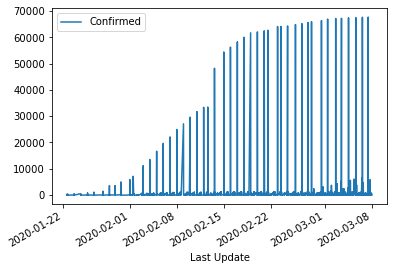

In [20]:
df.sort_values('Last Update').plot('Last Update', 'Confirmed')

In [33]:
confirmed = df.groupby('Last Update').Confirmed.sum()
confirmed

Last Update
2020-01-22 17:00:00     555.0
2020-01-23 17:00:00     653.0
2020-01-24 17:00:00     941.0
2020-01-25 17:00:00    1438.0
2020-01-26 16:00:00    2118.0
                        ...  
2020-03-07 20:33:02     949.0
2020-03-07 20:43:03       3.0
2020-03-07 23:23:02     576.0
2020-03-07 23:43:03      33.0
2020-03-07 23:53:03      23.0
Name: Confirmed, Length: 1108, dtype: float64

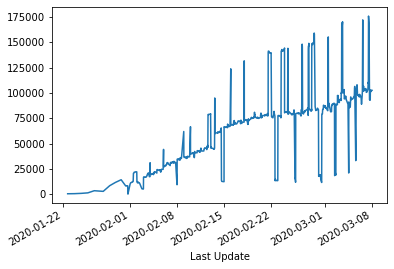

In [39]:
confirmed.rolling('1d').sum().plot()